In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image # Pillow

# --- Configuration for Kaggle ---
# This path is updated to match your dataset name
KAGGLE_DATA_ROOT = '/kaggle/input/face-recognition5'

# Construct the full paths
TRAIN_DIR = os.path.join(KAGGLE_DATA_ROOT, 'classification_data', 'train_data')
VAL_DIR = os.path.join(KAGGLE_DATA_ROOT, 'classification_data', 'val_data')
IMAGE_SIZE = (342, 342) # Based on your project PDF

In [2]:
# Simple transform for exploration: just resize and convert to tensor
explore_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor()
])

# Load the datasets
try:
    train_dataset = datasets.ImageFolder(
        root=TRAIN_DIR,
        transform=explore_transform
    )
    
    val_dataset = datasets.ImageFolder(
        root=VAL_DIR,
        transform=explore_transform
    )
    
    print("Datasets loaded successfully.")
    
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("\n---! FOLDER NOT FOUND !---")
    print(f"Make sure your data folders exist at:")
    print(f"Train: {os.path.abspath(TRAIN_DIR)}")
    print(f"Val:   {os.path.abspath(VAL_DIR)}")
except Exception as e:
    print(f"An error occurred: {e}")

Datasets loaded successfully.


In [3]:
# [cite_start]Get class names (the folder names / person IDs) [cite: 87]
class_names = train_dataset.classes
num_classes = len(class_names)

# Get total number of images
num_train_images = len(train_dataset)
num_val_images = len(val_dataset)

print(f"--- Dataset Statistics ---")
print(f"Total number of classes (people): {num_classes}")
print(f"Total training images: {num_train_images}")
print(f"Total validation images: {num_val_images}")
print(f"Example class names: {class_names[:5]}...") # Show first 5

--- Dataset Statistics ---
Total number of classes (people): 4000
Total training images: 380638
Total validation images: 8000
Example class names: ['n000003', 'n000010', 'n000011', 'n000013', 'n000015']...


In [4]:
print("Checking image counts per class (first 10 classes):")

# train_dataset.targets contains the label index for each image
# We can count occurrences of each index
targets = np.array(train_dataset.targets)
for i in range(min(num_classes, 10)): # Check first 10 classes
    class_name = class_names[i]
    count = np.sum(targets == i)
    print(f"- Class '{class_name}': {count} images")

Checking image counts per class (first 10 classes):
- Class 'n000003': 41 images
- Class 'n000010': 30 images
- Class 'n000011': 122 images
- Class 'n000013': 100 images
- Class 'n000015': 51 images
- Class 'n000017': 67 images
- Class 'n000018': 59 images
- Class 'n000020': 96 images
- Class 'n000023': 128 images
- Class 'n000024': 96 images


Displaying one batch of 16 training images...


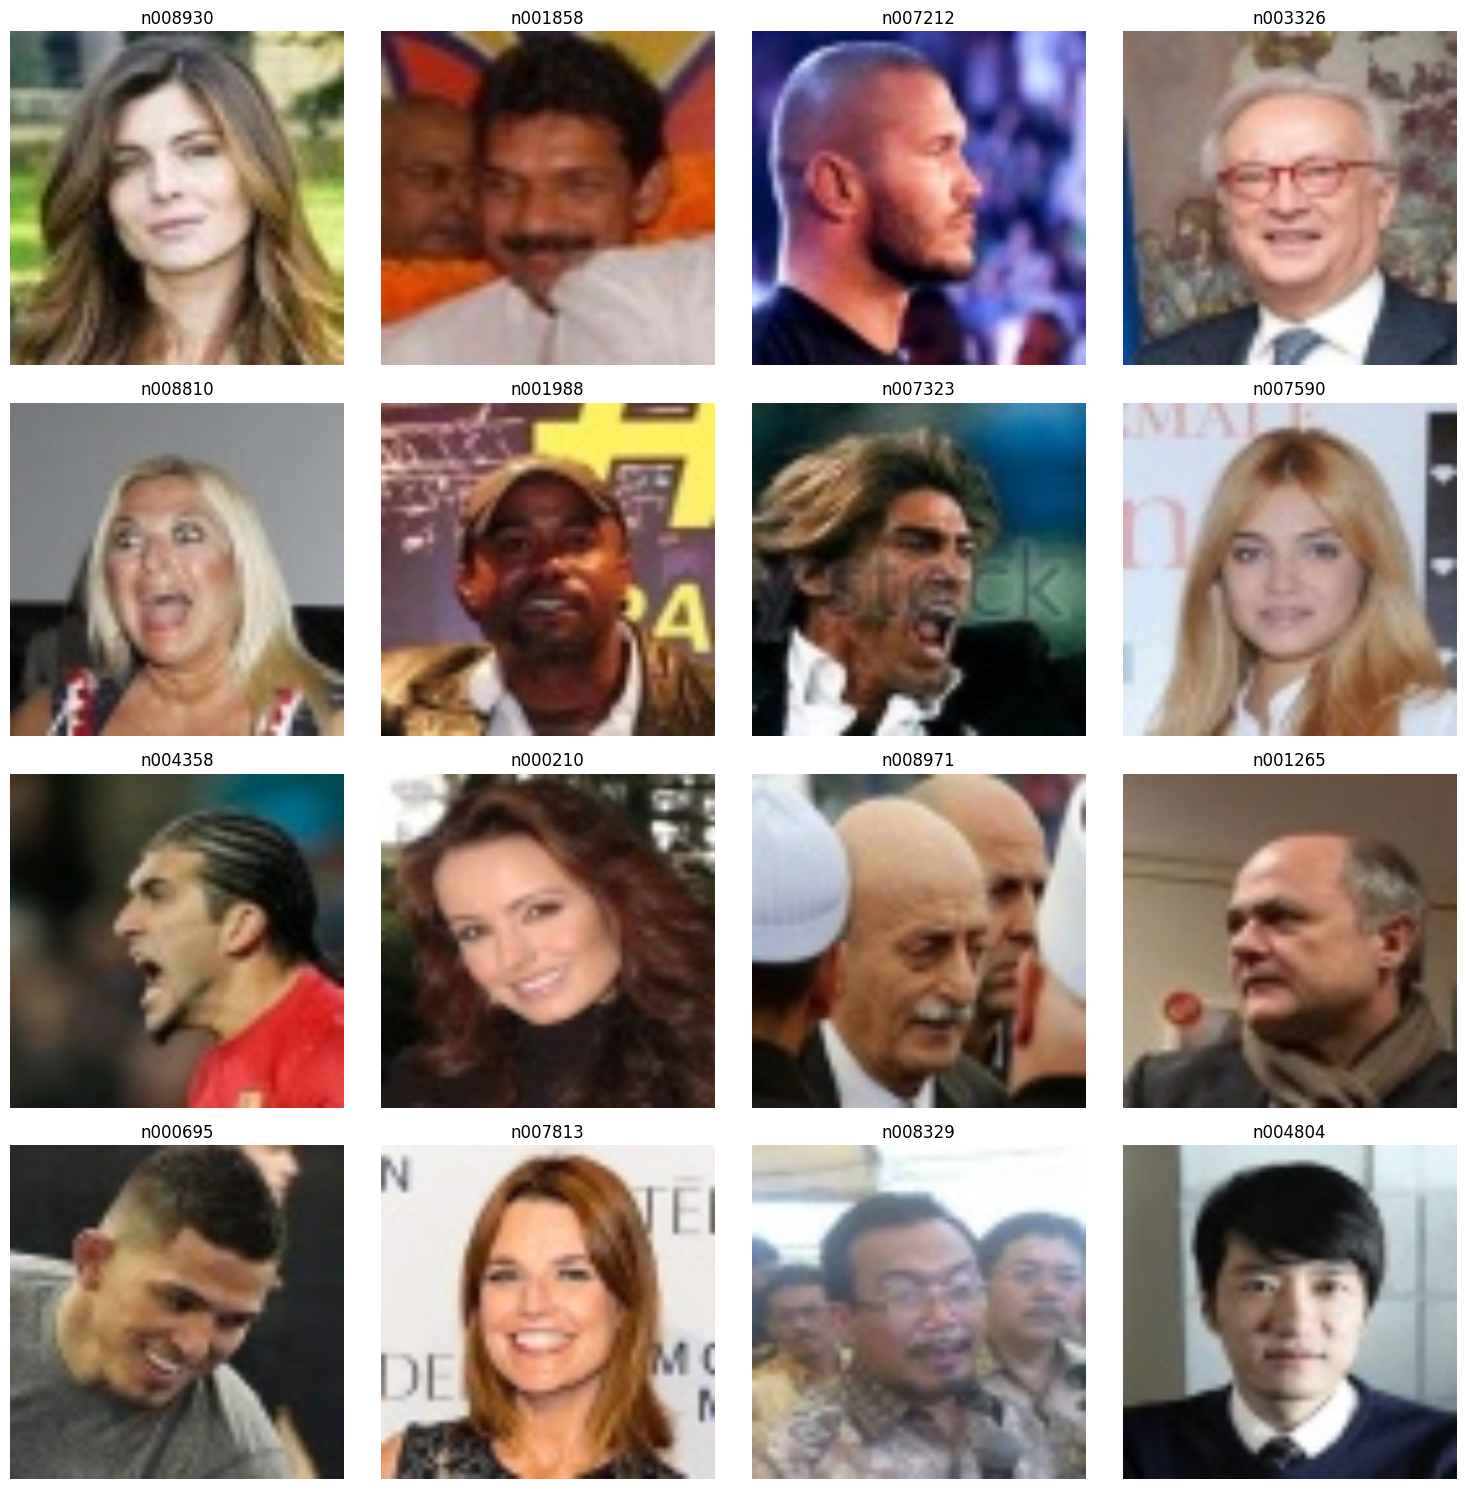

In [5]:
# Function to show a batch of images
def show_images(images, labels, class_names):
    # Create a grid of 4x4
    fig, axes = plt.subplots(4, 4, figsize=(15, 15))
    
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            # PyTorch Tensors are (C, H, W), Matplotlib expects (H, W, C)
            img = images[i].permute(1, 2, 0)
            
            # Undo normalization for display (if we had normalized)
            # For ToTensor() only, this isn't strictly needed
            img = img.numpy() 
            
            ax.imshow(img)
            ax.set_title(class_names[labels[i]])
            ax.axis('off') # Hide axes
        else:
            ax.axis('off') # Hide unused subplots
    
    plt.tight_layout()
    plt.show()

# Create a DataLoader to get a batch
train_loader_explore = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Get one batch
try:
    images, labels = next(iter(train_loader_explore))
    
    print("Displaying one batch of 16 training images...")
    show_images(images, labels, class_names)
    
except NameError:
    print("Could not display images. Was the dataset loaded correctly in Cell 2?")